In [176]:
import pandas as pd
import os
import matplotlib.pyplot as plt


TASK 1-Merging 12 different files of data into the single CSV file

In [177]:
df=pd.read_csv("Sales_Data/Sales_April_2019.csv")
df.head()

files=[file for file in os.listdir("Sales_Data")]

for file in files:
    print(file)

    #concatenating in single csv using a dataframe which is initilly empty


# Step 1: Initialize an empty DataFrame
all_months_data = pd.DataFrame()

# Step 2: List all CSV files in the directory
files = [file for file in os.listdir("Sales_Data") if file.endswith('.csv')]

# Step 3: Loop through each file and concatenate the data
for file in files:
    df = pd.read_csv("Sales_Data/" + file)  # Read the CSV file
    all_months_data = pd.concat([all_months_data, df], ignore_index=True)  # Concatenate to the main DataFrame

# Step 4: Save the combined DataFrame to a new CSV file
all_months_data.to_csv("all_months_data.csv", index=False)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


--> ignore_index=True: This ensures that the index is reset in the concatenated DataFrame, avoiding duplicate indices.
->> index=False: This parameter in to_csv() prevents the DataFrame's index from being written into the CSV file.

Now lets see top 5 rows of the all data file


In [178]:
all=pd.read_csv("all_months_data.csv")
all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


TASK-REMOVING THE VALUE FOR WHICH DATASET SHOW NAN AND SAVING BACK TO THE SAME FILE [all_months_data.csv]

In [179]:

# Step 1: Load the CSV file into a DataFrame
df = pd.read_csv("all_months_data.csv")

# Step 2: Remove rows with any NaN values
df_cleaned = df.dropna()

# Step 3: Reset the index to maintain correct order
df_cleaned.reset_index(drop=True, inplace=True)

# Step 4: Overwrite the original file with the cleaned data
df_cleaned.to_csv("all_months_data.csv", index=False)

# Step 5: Verify the cleaning (optional)
df_verified = pd.read_csv("all_months_data.csv")
print(df_verified.head())


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1   176559  Bose SoundSport Headphones                1      99.99   
2   176560                Google Phone                1        600   
3   176560            Wired Headphones                1      11.99   
4   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001  


QUESTION 1:WHAT WAS THE BEST MONTH FOR SALES?HOW MUCH MONEY WAS EARNED DURING THAT MONTH


In [180]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv("all_months_data.csv")

# Specify the date format for better parsing
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

# Proceed with your calculations
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Assuming 'Month' column is present and numeric or derived
df['Month'] = df['Order Date'].dt.month

# Group by 'Month' and sum the values
monthly_sales = df.groupby('Month').sum(numeric_only=True)['Sales']

# Find the month with the highest sales
best_month = monthly_sales.idxmax()
max_sales = monthly_sales.max()

# Output the results
print(f"The best month for sales was: {best_month}")
print(f"Total earnings during that month were: ${max_sales:.2f}")


The best month for sales was: 12.0
Total earnings during that month were: $4613443.34


TASK-SHOWING THE DATA OF SALES USING A GRAPH

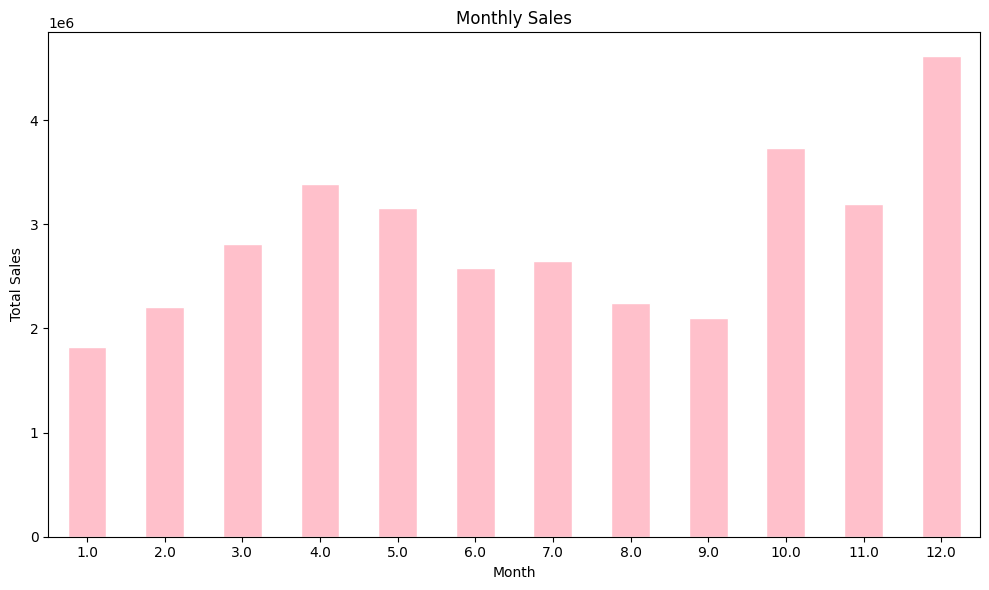

In [181]:

# # Load the cleaned data from a CSV file
# df = pd.read_csv("all_months_data.csv")

# # Ensure 'Order Date' is in datetime format
# df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# # Convert 'Quantity Ordered' and 'Price Each' to numeric
# df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
# df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# # Create a 'Sales' column
# df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# # Ensure 'Month' column is present or create it from 'Order Date'
# if 'Month' not in df.columns:
#     df['Month'] = df['Order Date'].dt.month

# # Group by 'Month' and sum the sales
# monthly_sales = df.groupby('Month').sum(numeric_only=True)['Sales']

# Plot the data
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='pink', edgecolor='white')

# Add title and labels
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(len(monthly_sales.index)), labels=monthly_sales.index, rotation=0)

# Display the plot
plt.tight_layout()
plt.show()



TASK-FINDING OUT THE CITY WITH MAX SALE AND THE NUMBER OF SALES

The city with the highest number of sales is: San Francisco
Number of sales in San Francisco: 44732


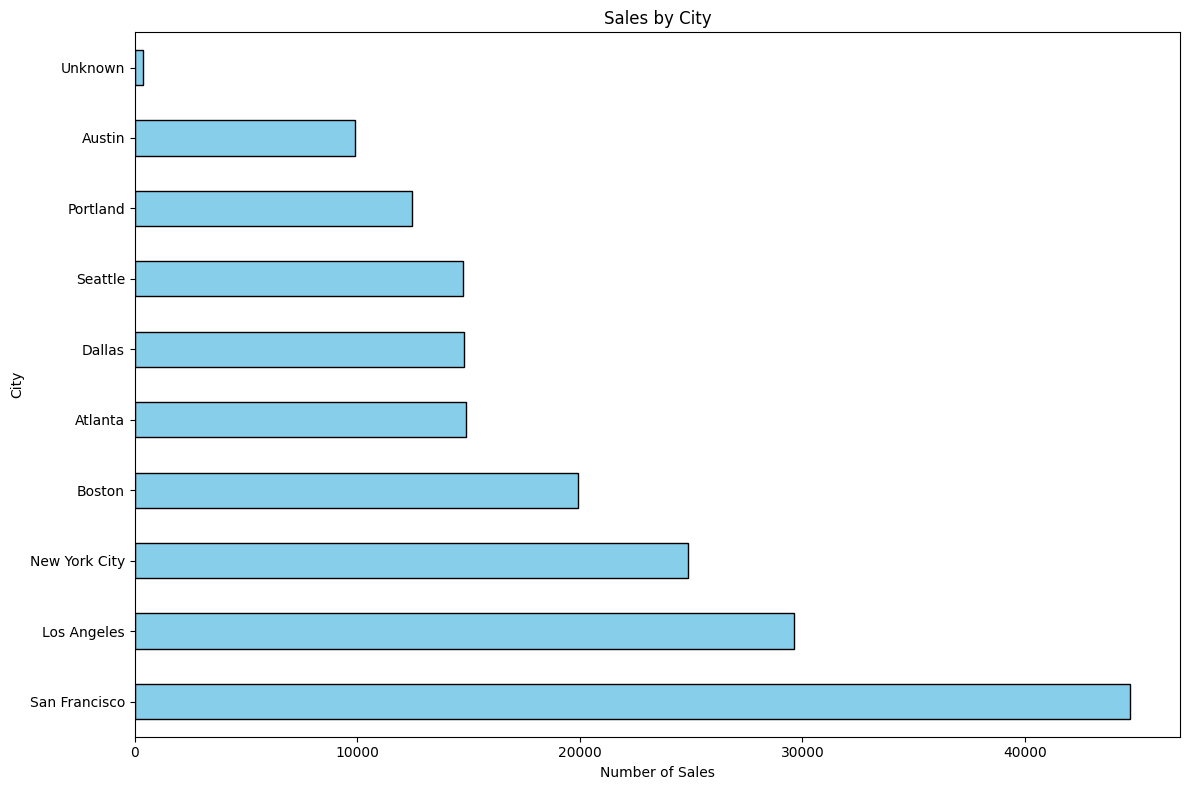

In [182]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the cleaned data from a CSV file
# df = pd.read_csv("all_months_data.csv")

# # Ensure 'Order Date' is in datetime format
# df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# # Convert 'Quantity Ordered' and 'Price Each' to numeric
# df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
# df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# # Create a 'Sales' column
# df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Function to extract city from 'Purchase Address'
def extract_city(address):
    try:
        # Split address by commas and return the second-to-last element
        return address.split(',')[-2].strip()
    except IndexError:
        # Return 'Unknown' if address format is inconsistent
        return 'Unknown'

# Apply the function to create 'City' column
df['City'] = df['Purchase Address'].apply(extract_city)

# Count the number of sales per city
city_sales = df['City'].value_counts()

# Find the city with the highest number of sales
top_city = city_sales.idxmax()
top_city_sales = city_sales.max()

# Output the results
print(f"The city with the highest number of sales is: {top_city}")
print(f"Number of sales in {top_city}: {top_city_sales}")

# Plot the data using a horizontal bar chart
plt.figure(figsize=(12, 8))
city_sales.plot(kind='barh', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Sales by City')
plt.xlabel('Number of Sales')
plt.ylabel('City')

# Display the plot
plt.tight_layout()
plt.show()


TASK-FINDING OUT BEST TIME TO SHOW THE ADVERTISEMENT TO INCREASE THE SALES

C:\Users\PALLAVI\AppData\Local\Temp\ipykernel_5108\1238278283.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


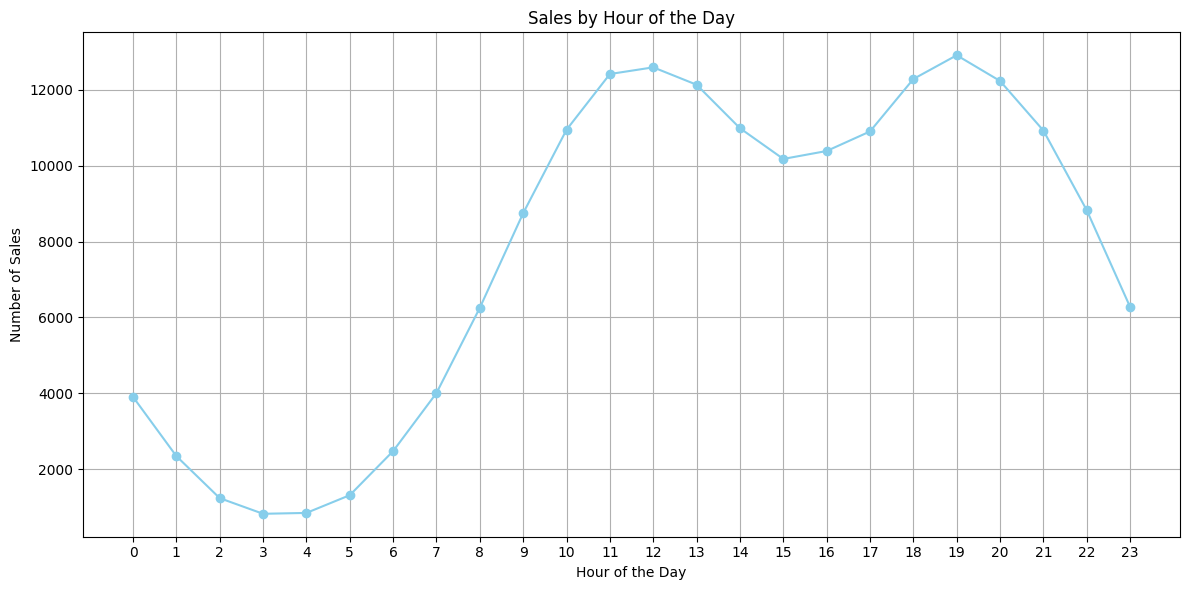

The best time to display advertisements is: 19.0:00
Number of sales during this hour: 12905


In [183]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Load the cleaned data from a CSV file
df = pd.read_csv("all_months_data.csv")

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract the hour of the day from 'Order Date'
df['Hour'] = df['Order Date'].dt.hour

# Count the number of sales or calculate total sales by hour
hourly_sales = df.groupby('Hour').size()  # For total number of sales
# hourly_sales = df.groupby('Hour')['Sales'].sum()  # For total sales revenue

# Plot the data using a line chart
plt.figure(figsize=(12, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-', color='skyblue')

# Add title and labels
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')  # Change to 'Total Sales' if using revenue
plt.xticks(range(0, 24))  # Show every hour on the x-axis

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the hour with the highest number of sales or revenue
best_hour = hourly_sales.idxmax()
best_hour_sales = hourly_sales.max()

# Output the results
print(f"The best time to display advertisements is: {best_hour}:00")
print(f"Number of sales during this hour: {best_hour_sales}")


TASK-MOST SOLD ITEMS

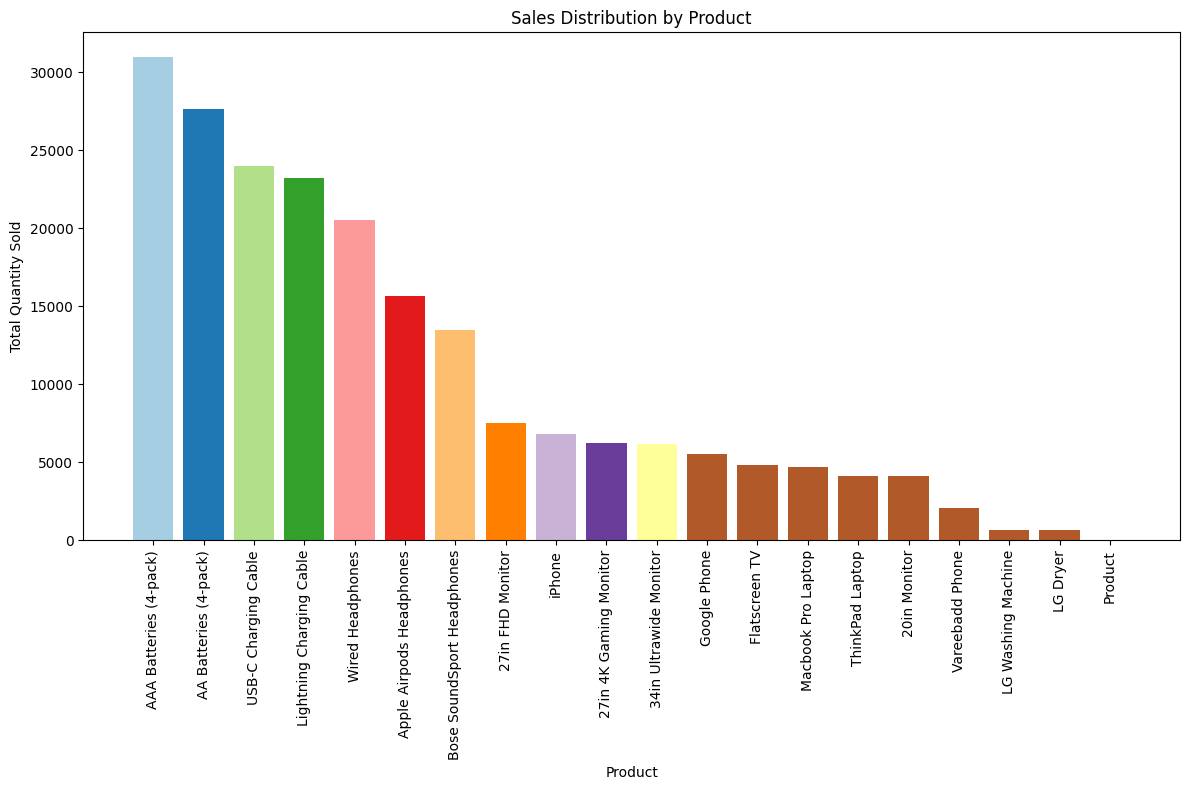

Product
AAA Batteries (4-pack)        31017.0
AA Batteries (4-pack)         27635.0
USB-C Charging Cable          23975.0
Lightning Charging Cable      23217.0
Wired Headphones              20557.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
27in FHD Monitor               7550.0
iPhone                         6849.0
27in 4K Gaming Monitor         6244.0
34in Ultrawide Monitor         6199.0
Google Phone                   5532.0
Flatscreen TV                  4819.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
20in Monitor                   4129.0
Vareebadd Phone                2068.0
LG Washing Machine              666.0
LG Dryer                        646.0
Product                           0.0
Name: Quantity Ordered, dtype: float64
The most sold item is: AAA Batteries (4-pack)
Total quantity sold: 31017.0


In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data from a CSV file
df = pd.read_csv("all_months_data.csv")

# Ensure 'Quantity Ordered' is in numeric format
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

# Group by 'Product' and sum up the 'Quantity Ordered'
product_sales = df.groupby('Product')['Quantity Ordered'].sum()

# Sort products by the quantity sold
product_sales = product_sales.sort_values(ascending=False)

# Plot the data using a bar chart
plt.figure(figsize=(12, 8))
plt.bar(product_sales.index, product_sales, color=plt.cm.Paired(range(len(product_sales))))

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Distribution by Product')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()
print(product_sales)#to check whether the product named element has 0 value 

# Output the results
most_sold_product = product_sales.idxmax()
most_sold_quantity = product_sales.max()
print(f"The most sold item is: {most_sold_product}")
print(f"Total quantity sold: {most_sold_quantity}")
